Plot the location of the files as obtained by the MODIS and VIIRS sensors.

In [17]:
import os
import hikinggc
import cartopy
import cartopy.crs as ccrs
import contextily as ctx
import logging
import rasterio
import cmocean
import datetime
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import matplotlib.patheffects as path_effects
import mplcyberpunk
from pyproj import Transformer
from matplotlib.font_manager import FontProperties
from pyproj import transform
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))
fp2 = FontProperties(fname="/home/ctroupin/.fonts/D-DIN.ttf")
from importlib import reload
reload(hikinggc)
import matplotlib
matplotlib.style.use("./hiking.mplstyle")

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("Let's start")

INFO:root:Let's start


In [3]:
class Source(object):
    def __init__(self, lon=np.array([]), lat=np.array([]), name=np.array([])):
        self.lon = lon
        self.lat = lat
        self.name = name
    
    def read_from_file(self, datafile):
        with open(datafile, "r") as df:
            for lines in df:
                line = lines.rstrip().split(",")
                self.lat = np.append(self.lat, float(line[0]))
                self.lon = np.append(self.lon, float(line[1]))
                self.name = np.append(self.name, line[2])

## Files and directories

In [4]:
basemapdir = os.path.join(hikinggc.datadir, "Basemaps/")
figdir = os.path.join(hikinggc.figdir)
topofile = os.path.join(hikinggc.datadir, '136_MDT25_GC/136_MDT25_GC_proj.tif')
sourcefile = os.path.join(hikinggc.datadir, "Rain/sources.dat")
sunsetfile = os.path.join(hikinggc.datadir, "Rain/BestSunset.dat")

## Read data 

In [20]:
topography = hikinggc.Topography()
topography.read_geotiff(topofile)
topography.image = np.ma.masked_less_equal(topography.image, 0.)
watersources = Source()
watersources.read_from_file(sourcefile)
sunsets = Source()
sunsets.read_from_file(sunsetfile)

## Make plots
### Configuration

In [6]:
CartoDB_DarkMatter = {
    'url': 'https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png',
    'attribution': '© OpenStreetMap contributors © CARTO',
    'subdomains': 'abcd',
    'maxZoom': 19
}
CartoDB_Positron = {
    'url': 'https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    'attribution': '© OpenStreetMap contributors CARTO',
    'maxZoom': 19
}

### Gran Canaria

In [7]:
GC = hikinggc.Island(bbox=hikinggc.gccoords)
basemapfilegc = os.path.join(basemapdir, "GC_CartoDB_Positron_12.tiff")
basemapfilegcdark = os.path.join(basemapdir, "GC_CartoDB_DarkMatter_12.tiff")

#### Water sources

In [9]:
plt.figure()
ax = plt.axes(projection=GC.proj)

for llon, llat in zip(watersources.lon, watersources.lat):
    ax.text(llon, llat, "\uf3c5", transform=hikinggc.data_crs, 
        fontproperties=fp1, ha="center", va="bottom", color=hikinggc.maingreen, zorder=3)
    
    ax.text(llon + 0.0035, llat - 0.003, "\uf3c5", transform=hikinggc.data_crs, rotation=230,
        fontproperties=fp1, ha="center", va="center", color=".7", zorder=2, alpha=.25)


ax.set_extent(GC.bbox)

vis = hikinggc.Visible()
vis.read_geotiff(basemapfilegc)

with rasterio.open(basemapfilegcdark) as r:
    bmap = r.read()
    bmap = np.transpose(bmap, [1,2,0])
    
ax.imshow(bmap, origin='upper', extent=vis.extent, transform=ccrs.epsg(3857), zorder=1, regrid_shape=3500)
ax.spines['geo'].set_color("w")


plt.savefig(os.path.join(hikinggc.figdir, "gc_sunset.jpg"))
plt.show()
plt.close()

IndentationError: unexpected indent (<ipython-input-9-d612daab89b9>, line 9)

#### Sunsets

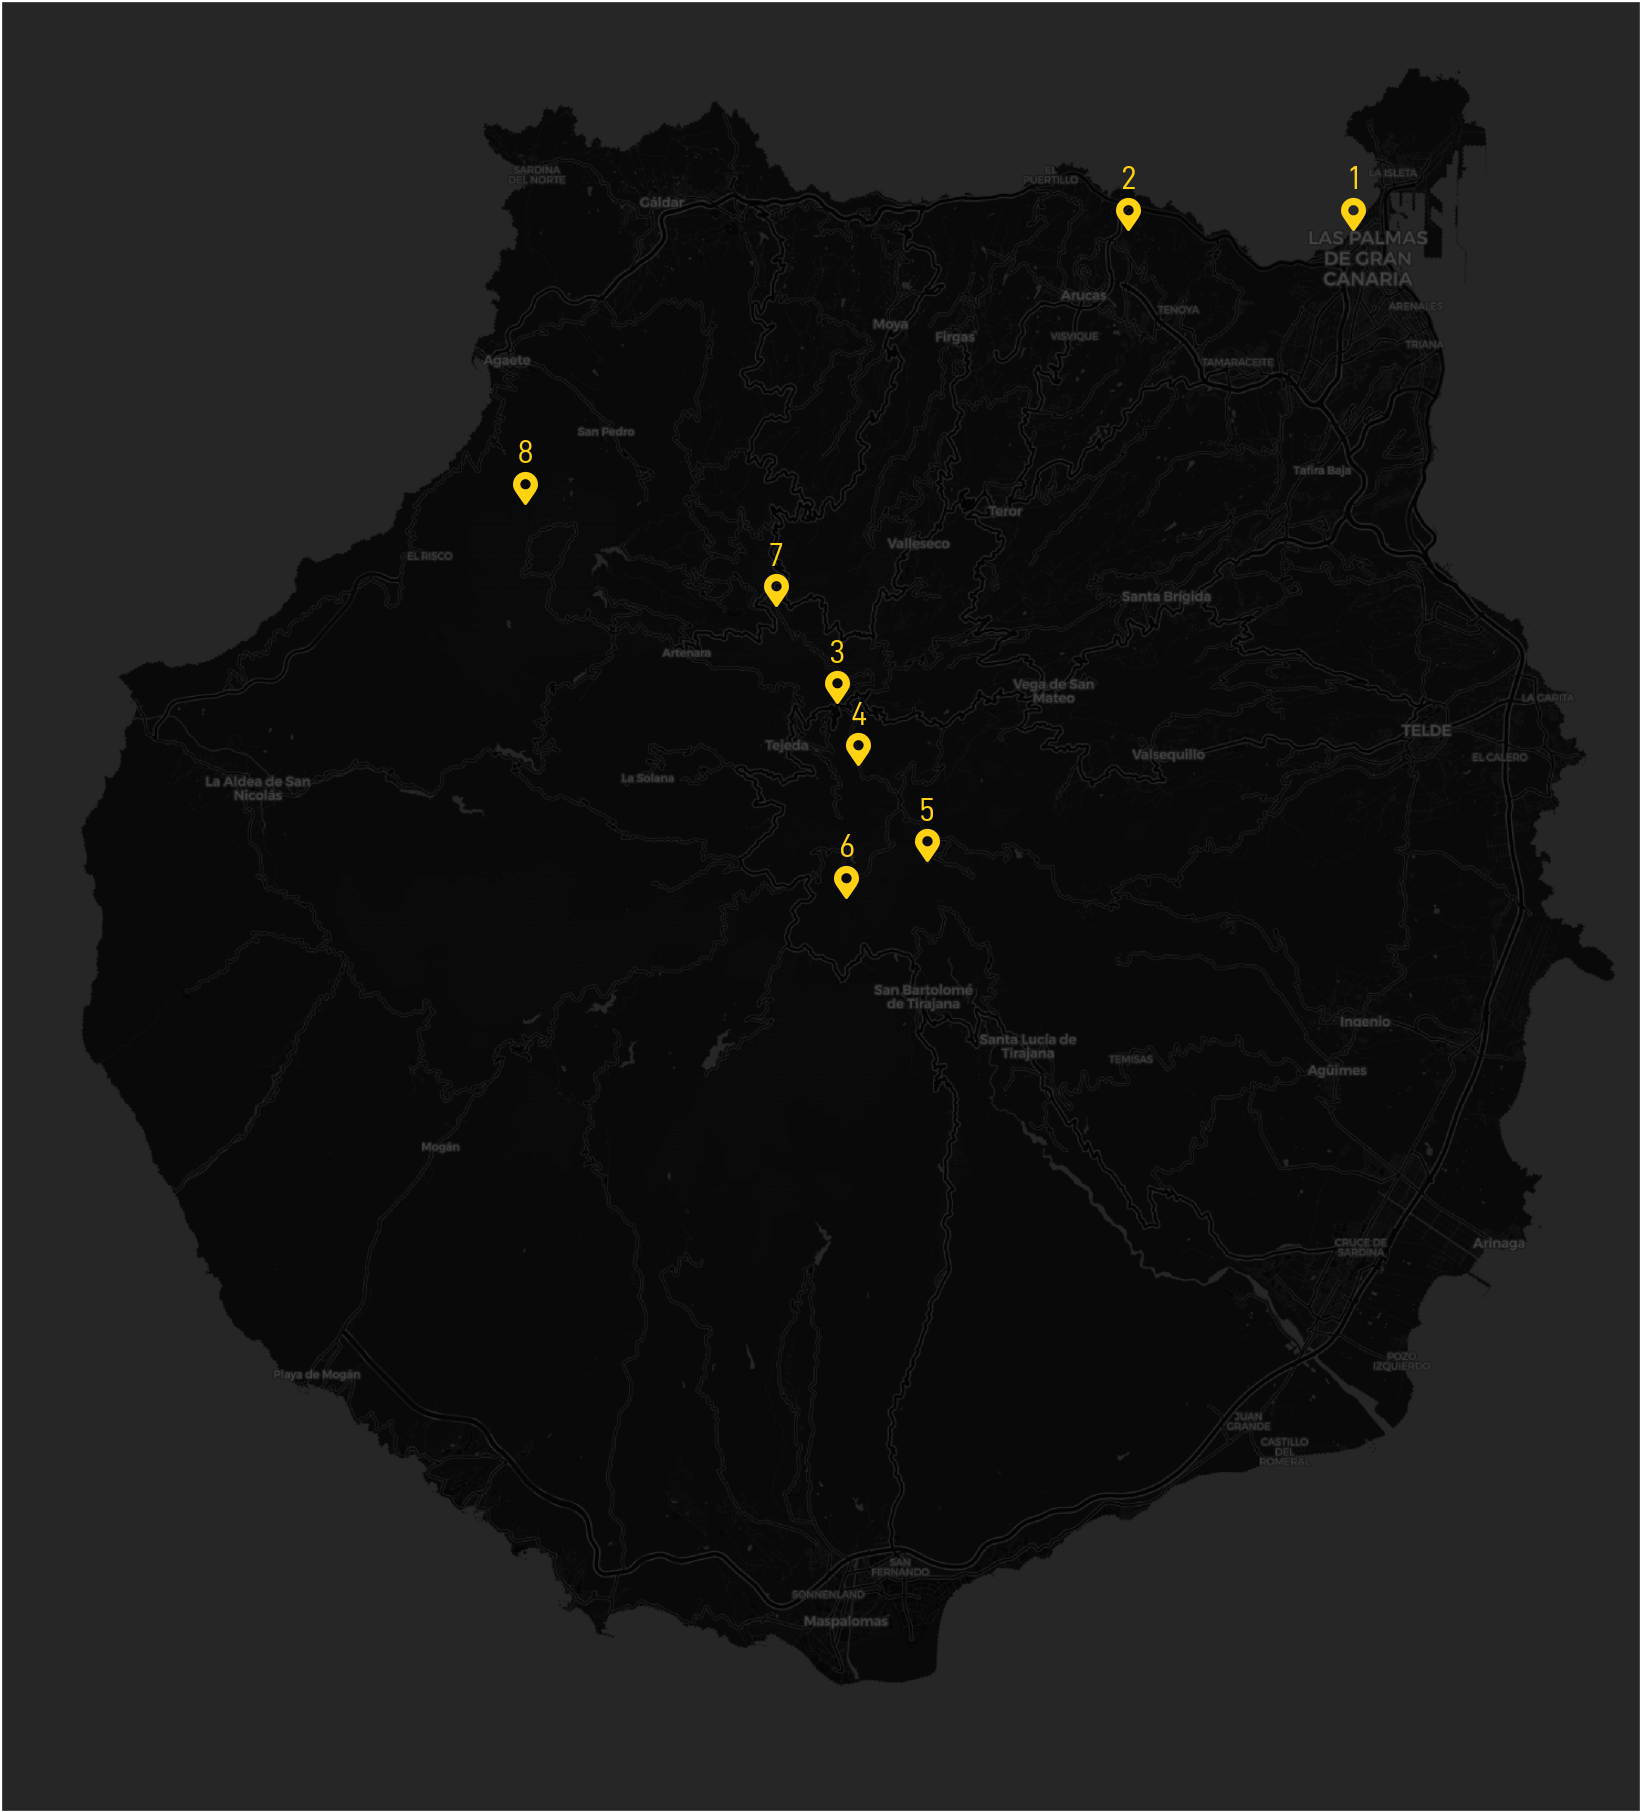

In [21]:
plt.figure()
ax = plt.axes(projection=GC.proj)

iii = 0
for llon, llat in zip(sunsets.lon, sunsets.lat):
    
    iii += 1
    ax.text(llon, llat, "\uf3c5", transform=hikinggc.data_crs, 
        fontproperties=fp1, ha="center", va="bottom", color="#FFD312", zorder=3)
    
    ax.text(llon, llat + 0.01, str(iii), transform=hikinggc.data_crs, 
        fontproperties=fp2, ha="center", va="bottom", color="#FFD312", zorder=3)
    
 #   ax.text(llon + 0.0035, llat - 0.003, "\uf3c5", transform=hikinggc.data_crs, rotation=230,
  #      fontproperties=fp1, ha="center", va="center", color=".7", zorder=2, alpha=.25)


ax.set_extent(GC.bbox)

vis = hikinggc.Visible()
vis.read_geotiff(basemapfilegcdark)

with rasterio.open(basemapfilegcdark) as r:
    bmap = r.read()
    bmap = np.transpose(bmap, [1,2,0])
    
ax.imshow(bmap, origin='upper', extent=vis.extent, transform=ccrs.epsg(3857), zorder=1, regrid_shape=3500)
ax.spines['geo'].set_color("w")


plt.savefig(os.path.join(hikinggc.figdir, "gc_sunset.jpg"))
plt.show()
plt.close()